In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 40.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
import pandas as pd

# Load data
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Standardize column values.

In [5]:
df['MonthlyCharges_z'] = df['MonthlyCharges'].apply(lambda x: (x - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std())


In [6]:
df.groupby('Contract')['MonthlyCharges'].mean()


,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


In [7]:
df['rolling_charges'] = df['MonthlyCharges'].rolling(3).mean()


In [8]:
df.sort_values('MonthlyCharges', ascending=False).head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_z,rolling_charges
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,1.794225,92.633333
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,No,1.790901,91.850000
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Electronic check,118.60,7365.7,No,1.789240,88.316667
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,1.789240,63.200000
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,1.780931,105.133333


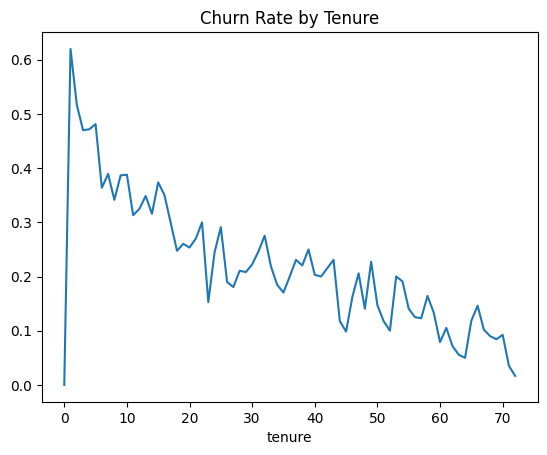

In [9]:
import matplotlib.pyplot as plt
df.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').mean()).plot()
plt.title("Churn Rate by Tenure")
plt.show()


In [10]:
df.corr(numeric_only=True)


,SeniorCitizen,tenure,MonthlyCharges,MonthlyCharges_z,rolling_charges
SeniorCitizen,1.000000,0.016567,0.220173,0.220173,0.111902
tenure,0.016567,1.000000,0.247900,0.247900,0.154253
MonthlyCharges,0.220173,0.247900,1.000000,1.000000,0.580694
MonthlyCharges_z,0.220173,0.247900,1.000000,1.000000,0.580694
rolling_charges,0.111902,0.154253,0.580694,0.580694,1.000000


In [11]:
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_z,rolling_charges
2995,2209-XADXF,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,No,Bank transfer (automatic),25.25,25.25,No,-1.313115,28.083333
4087,3847-BAERP,Female,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.90,247,No,-1.457681,46.816667
6250,3705-RHRFR,Female,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Bank transfer (automatic),99.15,6875.35,No,1.142847,78.150000
3379,0396-HUJBP,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.30,44.4,No,-1.510855,42.933333
2870,1400-WIVLL,Male,0,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,No,Electronic check,107.95,5969.85,No,1.435302,94.933333


In [13]:
df.rename(columns={'MonthlyCharges': 'Monthly_Charges'}, inplace=True)


In [14]:
df.filter(['customerID', 'MonthlyCharges', 'Churn'])


,customerID,Churn
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes
...,...,...
7038,6840-RESVB,No
7039,2234-XADUH,No
7040,4801-JZAZL,No
7041,8361-LTMKD,Yes


In [17]:
df = df.drop(df[df['Monthly_Charges'] == 0].index)


In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [20]:
df['charge_rank'] = df['Monthly_Charges'].rank(ascending=False)


In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly_Charges,TotalCharges,Churn,MonthlyCharges_z,rolling_charges,charge_rank
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,-1.160241,NaN,5397.5
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,-0.259611,NaN,4268.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,-0.362635,46.883333,4542.5
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,-0.746482,51.033333,5154.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.197351,55.616667,3469.0
